In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [82]:
train = pd.read_csv("data/train.csv", delimiter=",")
test = pd.read_csv("data/test.csv", delimiter=",")

In [83]:
train_data = np.array(train, dtype = 'float32')
X_test = np.array(test, dtype='float32')

In [84]:
X_train = train_data[:,1:]/255

y_train = train_data[:,0]

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2,random_state = 713)

In [86]:
# plt.figure(figsize=(10, 10))
# for i in range(36):
#     plt.subplot(6, 6, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i].reshape((28,28)))
#     label_index = int(y_train[i])
# plt.show()

In [87]:
image_shape = (28,28,1) 

In [88]:
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)

In [124]:
initializer = GlorotNormal()

model = keras.Sequential([
    #base
    layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=image_shape),
    #heatete
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [125]:
history = model.fit(
    X_train, y_train,
    batch_size=512,
    validation_split=0.33,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    epochs=50,
    verbose=1
)

Epoch 1/50
66/66 [==============================] - 10s 138ms/step - loss: 0.6067 - accuracy: 0.8270 - val_loss: 0.2551 - val_accuracy: 0.9262
Epoch 2/50
66/66 [==============================] - 9s 138ms/step - loss: 0.2231 - accuracy: 0.9349 - val_loss: 0.1857 - val_accuracy: 0.9460
Epoch 3/50
66/66 [==============================] - 9s 130ms/step - loss: 0.1544 - accuracy: 0.9572 - val_loss: 0.1410 - val_accuracy: 0.9582
Epoch 4/50
66/66 [==============================] - 9s 136ms/step - loss: 0.1101 - accuracy: 0.9702 - val_loss: 0.1142 - val_accuracy: 0.9665
Epoch 5/50
66/66 [==============================] - 9s 131ms/step - loss: 0.0872 - accuracy: 0.9761 - val_loss: 0.0967 - val_accuracy: 0.9723
Epoch 6/50
66/66 [==============================] - 9s 131ms/step - loss: 0.0700 - accuracy: 0.9809 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 7/50
66/66 [==============================] - 9s 134ms/step - loss: 0.0590 - accuracy: 0.9834 - val_loss: 0.0869 - val_accuracy: 0.9745
Epoch

In [126]:
history_df = pd.DataFrame(history.history)

In [127]:
test_loss, test_acc = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
confusion = confusion_matrix(y_test, y_pred_classes)
classification_report(y_test, y_pred_classes)

263/263 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       816
         1.0       0.99      0.99      0.99       942
         2.0       0.97      0.98      0.97       880
         3.0       0.96      0.98      0.97       846
         4.0       0.98      0.98      0.98       795
         5.0       0.98      0.97      0.97       778
         6.0       0.98      0.99      0.99       813
         7.0       0.99      0.97      0.98       876
         8.0       0.97      0.97      0.97       796
         9.0       0.97      0.97      0.97       858

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



Text(0.5, 1.0, 'Train - Accuracy')

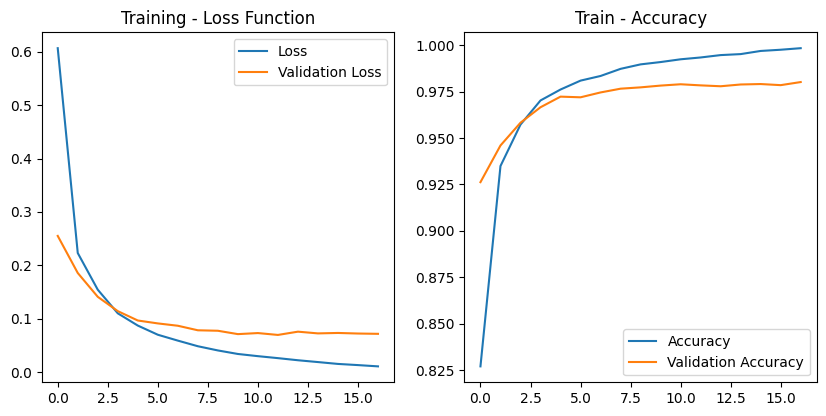

In [131]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')